# Regression model to predict EN1002V (Total number of hours of sunshine per day) using EN1003V (Average temperator of warmest month) and EN1004V (Average temperature of coldest month)

## Libraries

In [160]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math 
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

## Read Data

In [161]:
target = 'EN1002V'
# Load your data from a CSV file
data = pd.read_csv('SelectedData_'+ target + '.csv') 
# Update outliers (5 cities have reported total hours/years and not the daily average)
data.loc[data['EN1002V'] > 24, 'EN1002V'] = data.loc[data['EN1002V'] > 24, 'EN1002V'] /367
data.head()

,City,Year,EN1002V,EN1003V,EN1004V
0,BE,1991,4.60,19.0,0.0
1,ES011C,1991,5.88,19.9,6.4
2,ES013C,1991,4.84,20.3,8.8
3,ES015C,1991,4.87,24.5,12.2
4,FI002C,1991,4.22,17.1,-8.0


## Correlation Matrix

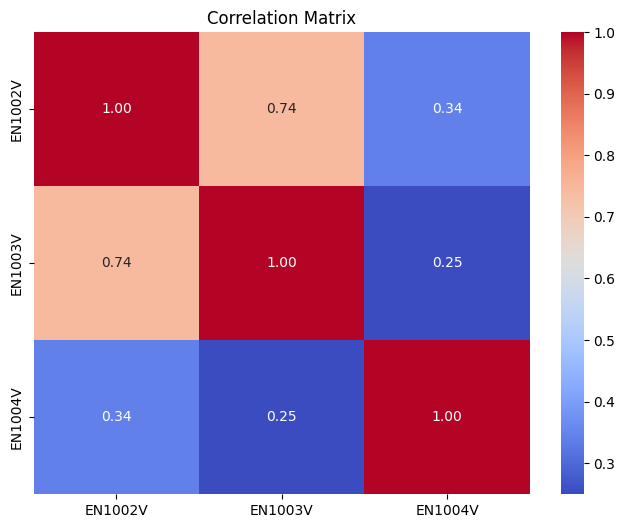

In [162]:
corr_matrix = data.iloc[:, 2:].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

## Split data into training and testing

In [163]:
X = data.iloc[:, 3:] 
y = data.iloc[:, 2]    

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Create and train a Gradient Boosting Regressor

In [164]:
# Initialize the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=125, random_state=42) 

# Train the regressor
gb_regressor.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=125, random_state=42)

## Predict and Evaluate the model

In [165]:
# Predict on the test set
y_pred = gb_regressor.predict(X_test)

# Calculate Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {abs(y_pred - y_test).sum()/len(y_pred)}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {math.sqrt(mse)}")
print(f"R2: {r2}")

Mean Absolute Error: 0.48395728204834754
Mean Squared Error: 0.40639158816053106
Root Mean Squared Error: 0.6374885004143456
R2: 0.6778548607492382


## Save the model

In [166]:
joblib.dump(gb_regressor, target+'.pkl')

['EN1002V.pkl']

## Visualize the Results

### Distribution

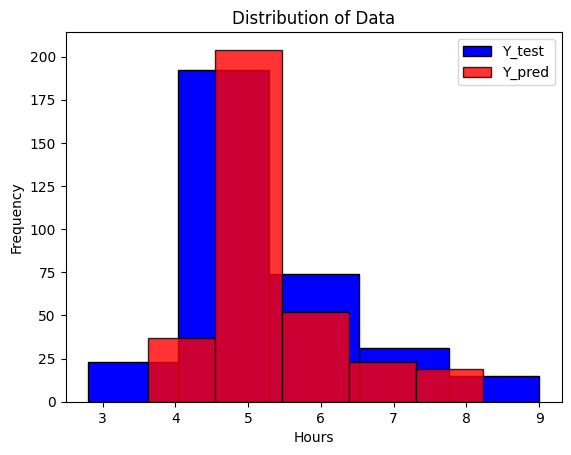

In [175]:
plt.hist(y_test, bins=5, color='blue', edgecolor='black', alpha=1, label='Y_test')
plt.hist(y_pred, bins=5, color='red', edgecolor='black', alpha=0.8, label='Y_pred')


plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Distribution of Data')
plt.legend()
plt.show()

### Y_test vs Y predicted

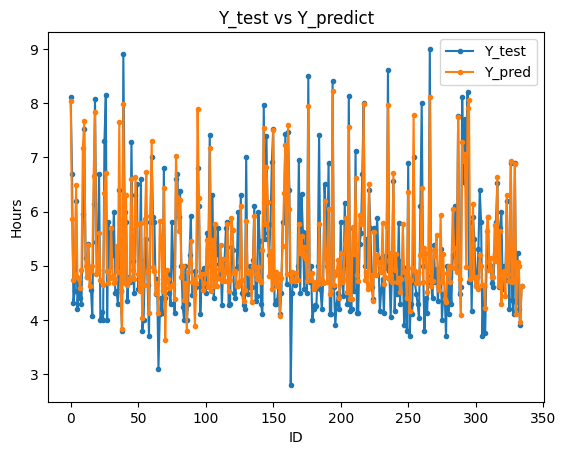

In [176]:
plt.plot(list(y_test), marker='.', linestyle='-', label = 'Y_test')
plt.plot(list(y_pred), marker='.', linestyle='-', label = 'Y_pred')

plt.xlabel('ID')
plt.ylabel('Hours')
plt.title('Y_test vs Y_predict')
plt.legend()
plt.show()

## Predict on Missing

In [179]:
# Load the saved model
loaded_model = joblib.load(target+'.pkl')
X_missing = pd.read_csv('X_missing_'+ target +'.csv')

In [180]:
X_missing

,City,Year,EN1003V,EN1004V
0,FI004C,1991.0,16.0,-11.8
1,LT001C,1992.0,19.0,-1.8
2,LT002C,1992.0,18.9,-0.9
3,LT,1992.0,18.5,-0.6
4,LT003C,1992.0,18.7,-0.5
...,...,...,...,...
294,PL003C,2012.0,20.2,-1.4
295,LV003C,2012.0,18.0,-9.2
296,PL006C,2012.0,18.1,0.6
297,PL014C,2012.0,18.8,-1.7


In [182]:
X_missing[target] = loaded_model.predict(X_missing.iloc[:, 2:])

In [183]:
X_missing

,City,Year,EN1003V,EN1004V,EN1002V
0,FI004C,1991.0,16.0,-11.8,4.828652
1,LT001C,1992.0,19.0,-1.8,4.735574
2,LT002C,1992.0,18.9,-0.9,4.870377
3,LT,1992.0,18.5,-0.6,4.955581
4,LT003C,1992.0,18.7,-0.5,5.051866
...,...,...,...,...,...
294,PL003C,2012.0,20.2,-1.4,4.799052
295,LV003C,2012.0,18.0,-9.2,5.688542
296,PL006C,2012.0,18.1,0.6,4.939495
297,PL014C,2012.0,18.8,-1.7,4.821953


In [184]:
X_missing.to_csv('Filled_'+ target +'.csv', index=False)